In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [64]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.shape

(768, 9)

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
train = df[df['Insulin'] > 0].copy()
test = df[df['Insulin'] == 0].copy()

In [67]:
feature_names = test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [68]:
label_name = 'Insulin'
label_name

'Insulin'

In [69]:
X_train = train[feature_names]
X_train.shape

(394, 8)

In [70]:
y_train = train[label_name]
y_train.shape

(394,)

In [71]:
X_test = test[feature_names]
X_test.shape

(374, 8)

In [72]:
y_test = test[label_name]
y_test.shape

(374,)

In [73]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
model

DecisionTreeRegressor(random_state=42)

In [74]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [75]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_pred

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([ 25., 480.,  55., 145., 495., 130., 220., 285., 176., 155., 237.,
       120.,  56., 415., 185.,  25.,  99., 215., 265., 210.,  90., 265.,
        59., 495., 125., 277., 220.,  94., 180.,  44., 115.,  86., 135.,
       291., 115.,  75., 100., 480.,  78.,  57., 180., 155.,  15.,  54.,
       220., 115., 330., 122.,  66.,  84., 168., 231.,  32., 194.,  58.,
       579.,  75.,  54., 106., 120., 106.,  96., 321.,  49., 318.,  70.,
        87., 152., 158., 291.,  99., 145., 231., 167., 100., 165.,  25.,
       210., 190., 150., 110.,  87., 293.,  66.,  49., 342., 100.,  89.,
        49., 846., 110., 192., 204., 130., 235., 182., 191., 166.,  49.,
       105., 207., 115., 250.,  74., 140., 215., 152., 167., 215.,  71.,
        56., 249., 120., 540.,  43.,  37., 207., 210., 130., 465., 310.,
       146.,  40., 190., 392., 237., 200., 190., 142.,  60., 110.,  89.,
       182., 144., 495., 600., 235., 150.,  86., 200., 125., 176., 210.,
       250., 293.,  79., 152.,  46., 291.,  48.,  7

In [76]:
(y_pred == y_train).sum()

3

In [77]:
len(y_train)

394

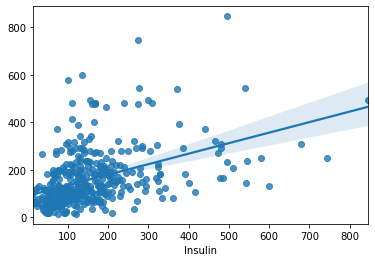

In [78]:
sns.regplot(y_train, y_pred)

In [79]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred)

-0.14429295602725567

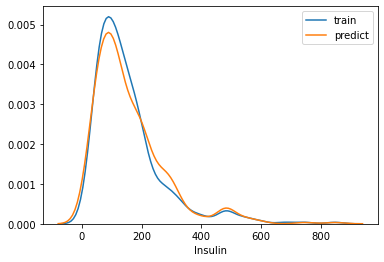

In [80]:
sns.distplot(y_train, label='train', hist=False)
sns.distplot(y_pred, label="predict", hist=False)

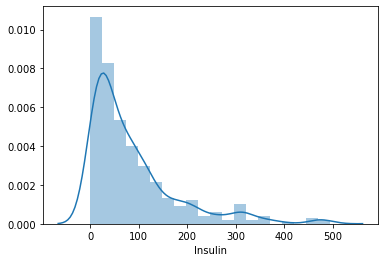

In [81]:
# 오차 구하기

# MAE
error = abs(y_train - y_pred)
error.mean()
sns.distplot(error)

In [82]:
error.describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

In [83]:
# RMSE

rmse = np.sqrt(((y_train - y_pred) ** 2).mean())
rmse

126.89512636995443

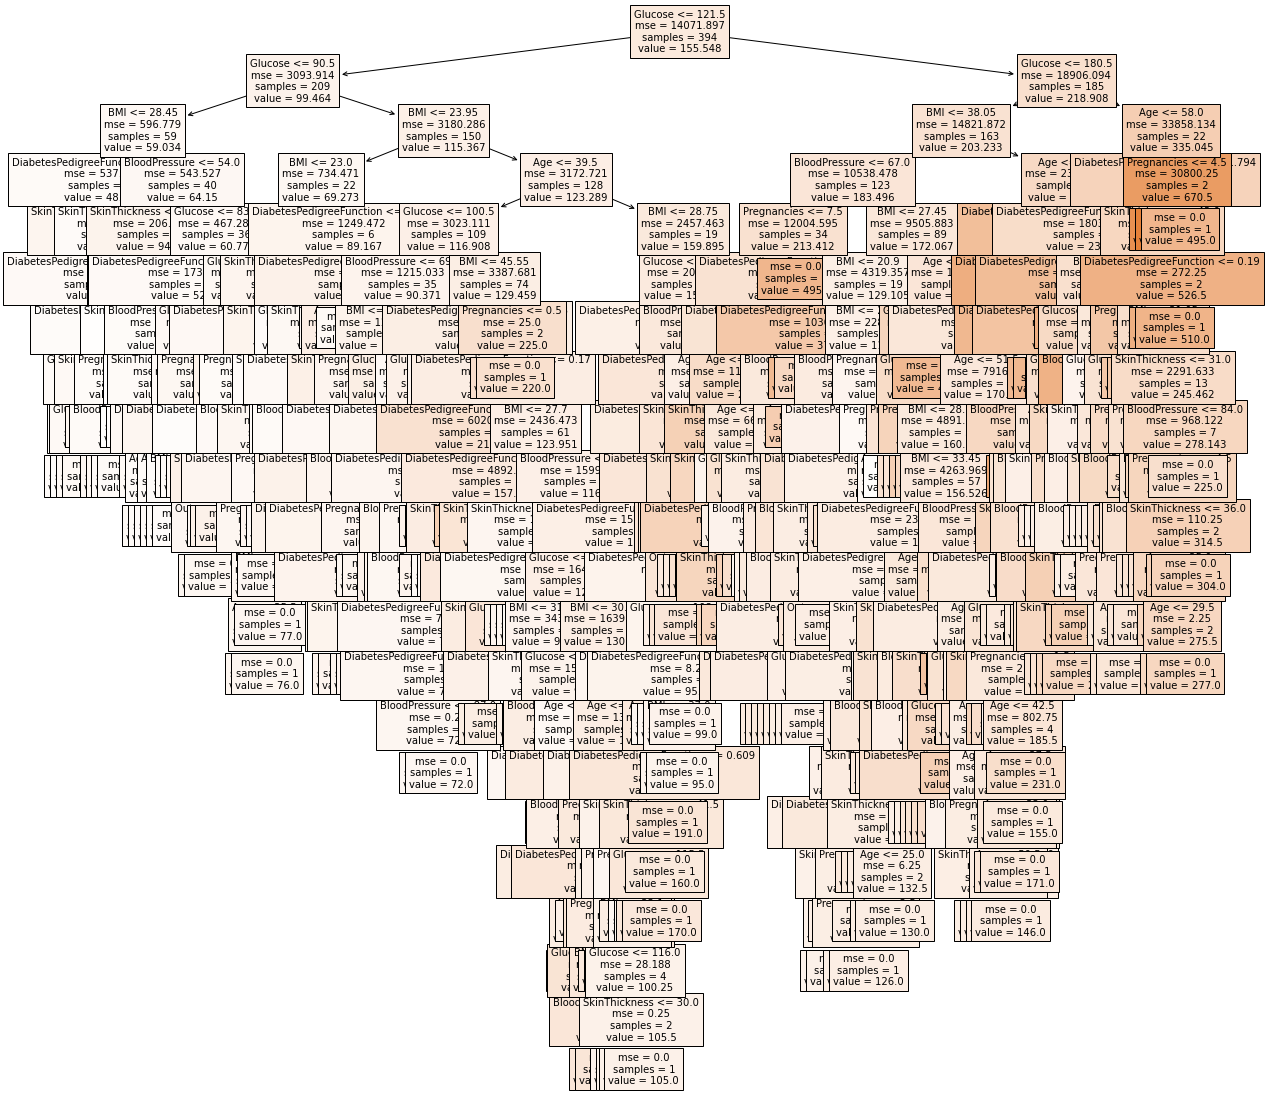

In [84]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

In [85]:
model.feature_importances_

array([4.20201517e-02, 4.08219914e-01, 6.24932543e-02, 5.97519119e-02,
       1.10296456e-01, 1.63917473e-01, 1.52984660e-01, 3.16179009e-04])

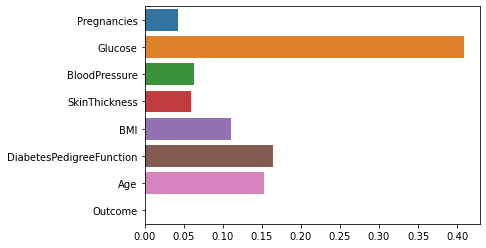

In [86]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [87]:
# reg 예측

y_test = model.predict(X_test)
y_test

array([168.,  37., 145.,  36., 182., 326., 175., 171.,  75.,  54., 116.,
       105., 207.,  63., 321., 170., 190.,  64., 360.,  22., 150.,  65.,
       108.,  74., 318., 579., 106.,  49.,  64.,  64.,  40., 321.,  76.,
       155.,  43., 105.,  36.,  92., 105., 180.,  45.,  94.,  49.,  88.,
       130.,  71.,  82.,  94.,  71., 370., 180., 325.,  15., 144.,  83.,
       194., 415.,  64.,  56.,  49.,  50., 285.,  77., 115.,  87., 120.,
        61., 200., 258., 495., 106., 180., 148., 175., 184.,  89.,  48.,
       285.,  94.,  87., 280., 182., 126.,  86., 176., 291.,  78., 135.,
       116.,  99., 125., 370., 108.,  94.,  40., 360., 192.,  82., 318.,
       180.,  94.,  36.,  92., 370., 130., 120., 126., 325.,  23., 100.,
       300., 115., 105., 285.,  36.,  64., 158., 485., 130., 255., 485.,
       176.,  46.,  87., 105., 130., 130., 182., 190., 360.,  37., 200.,
        78., 100.,  83.,  57., 285., 140.,  83., 250., 105., 115., 220.,
       148., 105., 112., 258., 130., 115., 258., 31

In [88]:
train.groupby('Outcome')['Insulin'].agg(['mean', 'median'])

,mean,median
Outcome,,
0,130.287879,102.5
1,206.846154,169.5


In [89]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [90]:
test['Insulin'] = y_test
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.161017,102.224032,15.0,64.0,99.5,158.25,600.0
1,138.0,212.434783,141.952236,44.0,115.0,176.0,267.00,846.0


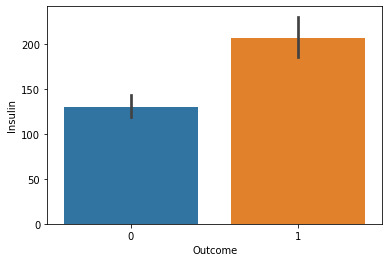

In [91]:
# Insulin 평균값
sns.barplot(data= train, x="Outcome", y="Insulin")

In [ ]:
# 예측값
sns.barplot(data=test, x="Outcome", y="Insulin")